## AUTOENCODERS con h2o

In [2]:
#!pip install h2o

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 249.1/249.1 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153922 sha256=7411b405570c9cda21cedf6d2355c4b34d9441241945a5ec211f111ee9b19c17
  Stored in directory: c:\users\alexander\appdata\local\pip\cache\wheels\8b\46\17\c57cc5777a58f2997ed75980af0aa57078b51a1d9a01ca87a3
Successfully built h2o


In [5]:
import h2o

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import multiprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.2+9-78, mixed mode, sharing)
  Starting server from C:\Users\Alexander\AppData\Roaming\Python\Python310\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ALEXAN~1\AppData\Local\Temp\tmpig6r24s5
  JVM stdout: C:\Users\ALEXAN~1\AppData\Local\Temp\tmpig6r24s5\h2o_Alexander_started_from_python.out
  JVM stderr: C:\Users\ALEXAN~1\AppData\Local\Temp\tmpig6r24s5\h2o_Alexander_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Cancun
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_Alexander_u78wcl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.959 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
#!pip install wordcloud

In [6]:
dato = pd.read_csv("Data1/creditcard.csv")

In [7]:
dato.shape

(284807, 31)

In [8]:
dato.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Convierte el marco de Python pandas en un H2OFrame
creditData_h2o = h2o.H2OFrame(dato)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Text(0, 0.5, 'Frecuencia')

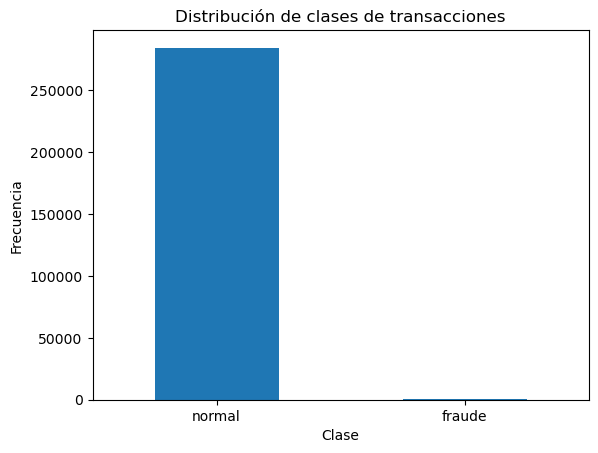

In [11]:
# Grafiquemos
etiquetas_frecuencia = ['normal', 'fraude']
classes = pd.value_counts(dato['Class'], sort = True)
classes.plot(kind = 'bar', rot = 0)
plt.title("Distribución de clases de transacciones")
plt.xticks(range(2), etiquetas_frecuencia)
plt.xlabel("Clase")
plt.ylabel("Frecuencia")

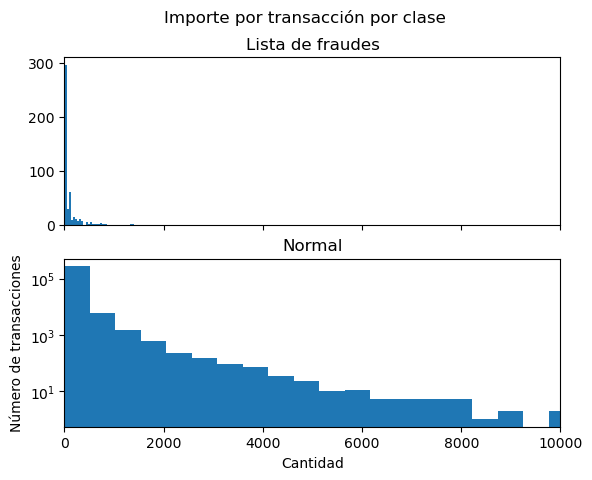

In [12]:
fraude = dato[dato.Class == 1]
normal = dato[dato.Class == 0]

# Cantidad vs clase
f, (ax1, ax2) = plt.subplots (2,1, sharex = True)
f.suptitle( 'Importe por transacción por clase')
ax1.hist(fraude.Amount, bins = 50)
ax1.set_title('Lista de fraudes')
ax2.hist(normal.Amount, bins = 50)
ax2.set_title('Normal')
plt.xlabel('Cantidad')
plt.ylabel('Número de transacciones')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show()

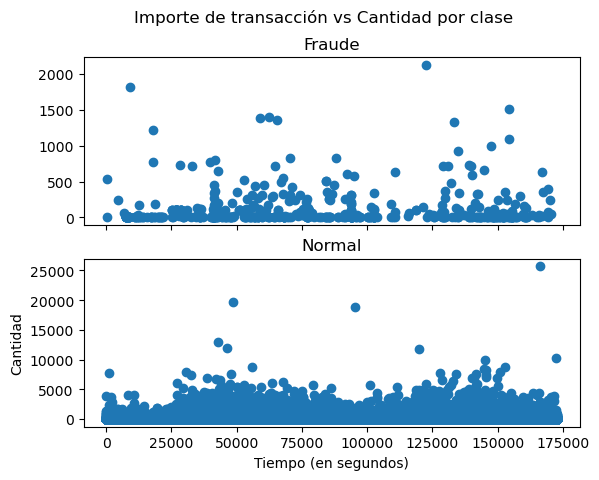

In [13]:
# Time vs Amount
f, (ax1, ax2) = plt.subplots (2,1, sharex = True)
f.suptitle( 'Importe de transacción vs Cantidad por clase')

ax1.scatter(fraude.Time, fraude.Amount)
ax1.set_title('Fraude')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Tiempo (en segundos)')
plt.ylabel('Cantidad')
plt.show()

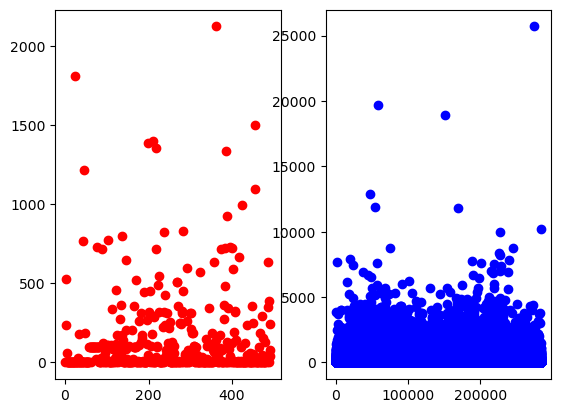

In [18]:
#color = {1:'red', 0:'blue'}
fraudlist = dato[dato.Class == 1]
normal = dato[dato.Class == 0]

fig,axes = plt.subplots(1,2)
axes[0].scatter(list(range(1,fraudlist.shape[0] + 1)), fraudlist.Amount,color='red')
axes[1].scatter(list(range(1, normal.shape[0] + 1)), normal.Amount,color='blue')
plt.show()

In [19]:
variables= creditData_h2o.drop(['Time'], axis=1) #quitando la variable tiempo

In [20]:
train, test = variables.split_frame([0.8])
print(train.shape)
print(test.shape)

(227973, 30)
(56834, 30)


In [21]:
train_df = train.as_data_frame() #transformar a dataframe
test_df = test.as_data_frame()

train_df = train_df[train_df['Class'] == 0]
train_df = train_df.drop(['Class'], axis=1)

In [22]:
train_df.head(5), train_df.shape

(         V1        V2        V3        V4        V5        V6        V7  \
 0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 3 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 4 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
 
          V8        V9       V10  ...       V20       V21       V22       V23  \
 0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
 1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
 2  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
 3 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   
 4  0.260314 -0.568671 -0.371407  ...  0.084968 -0.208254 -0.559825 -0.026398   
 
         V24       V25       V26       V27       V28  

In [27]:
Y_test_df = test_df['Class']
test_df = test_df.drop(['Class'], axis=1)

In [28]:
test_df.head(5), test_df.shape

(         V1        V2        V3        V4        V5        V6        V7  \
 0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 1  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
 2  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116 -0.946365   
 3 -1.946525 -0.044901 -0.405570 -1.013057  2.941968  2.955053 -0.063063   
 4 -2.074295 -0.121482  1.322021  0.410008  0.295198 -0.959537  0.543985   
 
          V8        V9       V10  ...       V20       V21       V22       V23  \
 0  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
 1  0.081213  0.464960 -0.099254  ... -0.219633 -0.167716 -0.270710 -0.154104   
 2 -1.617935  1.544071 -0.829881  ... -0.230983  1.650180  0.200454 -0.185353   
 3  0.855546  0.049967  0.573743  ... -0.216715 -0.579526 -0.799229  0.870300   
 4 -0.104627  0.475664  0.149451  ... -0.386694 -0.403639 -0.227404  0.742435   
 
         V24       V25       V26       V27       V28  

In [29]:
# Modelamiento
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)
x = train_h2o.columns

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
x

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [31]:
train_h2o

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62
1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69
-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5
-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99
-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67
-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8
-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2
-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68
1.44904,-1.17634,0.91386,-1.37567,-1.97138,-0.629152,-1.42324,0.0484559,-1.72041,1.62666,1.19964,-0.67144,-0.513947,-0.095045,0.23093,0.0319675,0.253415,0.854344,-0.221365,-0.387226,-0.0093019,0.313894,0.0277402,0.500512,0.251367,-0.129478,0.0428499,0.0162533,7.8
0.384978,0.616109,-0.8743,-0.0940186,2.92458,3.31703,0.470455,0.538247,-0.558895,0.309755,-0.259116,-0.326143,-0.0900467,0.362832,0.928904,-0.129487,-0.809979,0.359985,0.707664,0.125992,0.0499237,0.238422,0.00912987,0.99671,-0.767315,-0.492208,0.0424724,-0.0543374,9.99


In [32]:
# Entrenamiento del modelo autoencoder con 2 neuronas en la capa oculta
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

anomaly_model = H2OAutoEncoderEstimator(activation = "Tanh",
                                        hidden = [14,7,7,14], # 4 capas ocultas conectadas, 14 y 7 codificador
                                                              # 7 y 14 decodificador
                                        epochs = 100,
                                        standardize = True,
                                        stopping_metric = 'MSE',
                                        loss = 'automatic',
                                        train_samples_per_iteration = 32,
                                        shuffle_training_data = True,
                                        autoencoder = True,
                                        l1 = 10e-05)
anomaly_model.train(x = x,
                    training_frame = train_h2o)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OAutoEncoderEstimator : Deep Learning
Model Key: DeepLearning_model_python_1692238205056_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 1,128 weights/biases, 21.4 KB, 2,668,875 training samples, mini-batch size 1
    layer    units    type    dropout    l1      l2    mean_rate           rate_rms             momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  ------  ---------  ------  ----  ------------------  -------------------  ----------  ----------------------  -------------------  ----------------------  ---------------------
    1        29       Input   0.0
    2        14       Tanh    0.0        0.0001  0.0   0.7798100336652084  0.2815486192703247   0.0         -0.023834414957932044   0.19738894701004028  -0.0007362305419209784  0.005327526479959488
    3        7        Tanh    0.0        0.0001  0.0   0.6868374192593049  0.38938093185424805  0.0         -0.025779654269640837   0.2897874116897583   -0.000895777254179626   0.0017180442810058594
    4        7        Tanh    0.0        0.0001  0.0   0.360387633573644   0.3820669651031494   0.0         -0.039946717192963534   0.3363863229751587   0.00018456718695308204  0.0005423766560852528
    5        14       Tanh    0.0        0.0001  0.0   0.6576760573958864  0.4193180799484253   0.0         0.016684846455964176    0.20477652549743652  -7.470427854380909e-05  0.0004269315395504236
    6        29       Tanh               0.0001  0.0   0.5835621249850546  0.45014381408691406  0.0         -0.0037272590809546043  0.08722078800201416  -0.001297239886821083   0.005341365933418274

ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0007278534783937561
RMSE: 0.026978759763817094

Scoring History: 
     timestamp            duration          training_speed    epochs              iterations    samples    training_rmse         training_mse
---  -------------------  ----------------  ----------------  ------------------  ------------  ---------  --------------------  ---------------------
     2023-08-16 23:11:15  0.627 sec         0.00000 obs/sec   0.0                 0             0.0        0.06245360110586908   0.003900452291091012
     2023-08-16 23:11:20  5.479 sec         16450 obs/sec     0.3499404586660105  2484          79637.0    0.027326414996882067  0.0007467329565818212
     2023-08-16 23:11:25  10.476 sec        19038 obs/sec     0.822347114991673   5872          187144.0   0.027574029348932574  0.000760327094535795
     2023-08-16 23:11:30  15.477 sec        19713 obs/sec     1.2840275428104388  9170          292210.0   0.02751674825651805   0.0007571714346125892
     2023-08-16 23:11:35  20.477 sec        20128 obs/sec     1.7527694410145316  12527         398883.0   0.027174244925890306  0.000738439587292275
     2023-08-16 23:11:40  25.480 sec        20558 obs/sec     2.241430222390178   15998         510089.0   0.02831889220006617   0.0008019596554389686
     2023-08-16 23:11:45  30.482 sec        20709 obs/sec     2.7123911887614085  19365         617267.0   0.02757465264738826   0.0007603614686241163
     2023-08-16 23:11:50  35.483 sec        20894 obs/sec     3.1951285960988343  22812         727125.0   0.02782905176031032   0.0007744561218780308
     2023-08-16 23:11:55  40.483 sec        21075 obs/sec     3.685107635791592   26312         838631.0   0.027288205955231046  0.0007446461842551072
     2023-08-16 23:12:00  45.485 sec        21085 obs/sec     4.149521252521169   29626         944319.0   0.028084317193696903  0.0007887288722361795
---  ---                  ---               ---               ---                 ---           ---        ---                   ---
     2023-08-16 23:12:45  1 min 30.494 sec  21129 obs/sec     8.330557667210082   59475         1895810.0  0.027161092721820417  0.000737724957843326
     2023-08-16 23:12:50  1 min 35.497 sec  20996 obs/sec     8.7391386500156     62

In [33]:
anomaly_model._model_json['output']['variable_importances'].as_data_frame().to_csv('importancia.csv')

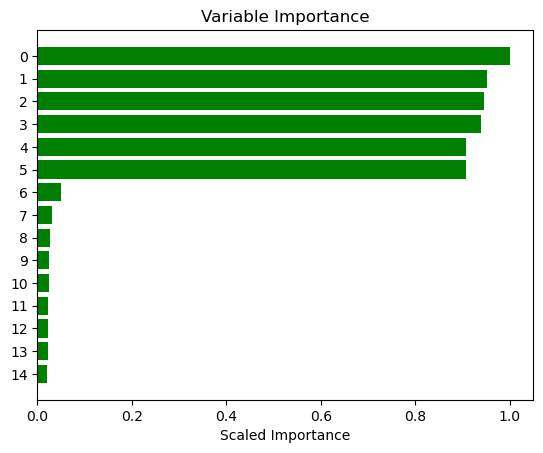

In [34]:
fig, ax = plt.subplots()

variables = anomaly_model._model_json['output']['variable_importances']['variable']
var = variables[0:15]
y_pos = np.arange(len(var))

scaled_importance = anomaly_model._model_json['output']['variable_importances']['scaled_importance']
sc = scaled_importance[0:15]

ax.barh(y_pos, sc, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
#ax.set_yticklabels(variables)
ax.invert_yaxis()
ax.set_xlabel('Scaled Importance')
ax.set_title('Variable Importance')
plt.show()

Text(0.5, 0, 'epoch')

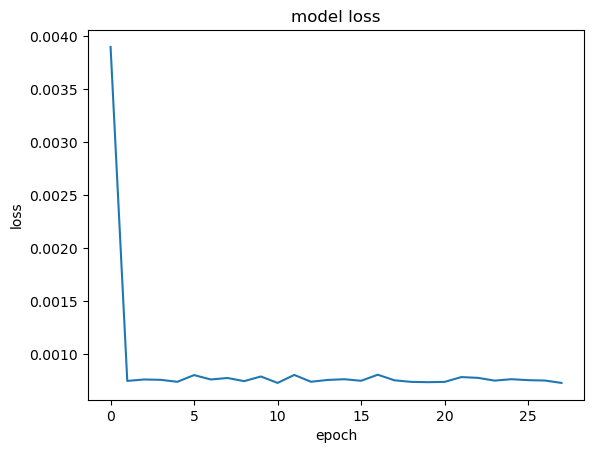

In [35]:
#plotting the loss
scoring_history = anomaly_model.score_history()
%matplotlib inline
plt.plot(scoring_history['training_mse'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

El conjunto de prueba contiene transacciones normales y fraudulentas.El Autoencoder aprenderá a indentificar el patrón de los datos de entrada. Si un punto de prueba anómalo no coincide con el patrón aprendido, es probable que el codificador automático tenga una alta tasa de error al reconstruir estos datos, lo que indica datos anómalos. Para que podamos identificar las anomalías de los datos. Para calcular el error, utiliza Mean Squared Error (MSE)

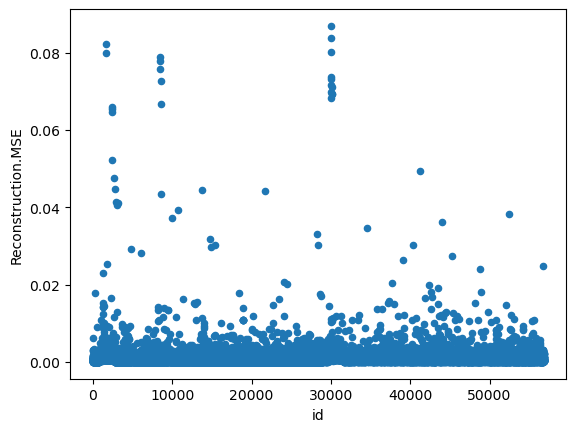

In [37]:
# error, función de perdida
test_rec_error = anomaly_model.anomaly(test_h2o)
test_rec_error_df = test_rec_error.as_data_frame()

test_rec_error_df['id']=test_rec_error_df.index
test_rec_error_df.plot(kind="scatter", x='id', y="Reconstruction.MSE")
plt.show()

In [38]:
test_rec_error_df

,Reconstruction.MSE,id
0,0.001860,0
1,0.000212,1
2,0.001462,2
3,0.000330,3
4,0.000194,4
...,...,...
56829,0.000417,56829
56830,0.000274,56830
56831,0.000175,56831
56832,0.002141,56832


In [39]:
# prediciendo la clase para el conjunto de datos de prueba
predicitons = anomaly_model.predict(test_h2o)
error_df = pd.DataFrame({'reconstruction_error': test_rec_error_df['Reconstruction.MSE'],
                         'true_class': Y_test_df})

error_df.describe()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,reconstruction_error,true_class
count,56834.000000,56834.000000
mean,0.000776,0.001619
std,0.001851,0.040201
min,0.000038,0.000000
25%,0.000298,0.000000
50%,0.000497,0.000000
75%,0.000866,0.000000
max,0.086931,1.000000


In [40]:
error_df

,reconstruction_error,true_class
0,0.001860,0
1,0.000212,0
2,0.001462,0
3,0.000330,0
4,0.000194,0
...,...,...
56829,0.000417,0
56830,0.000274,0
56831,0.000175,0
56832,0.002141,0


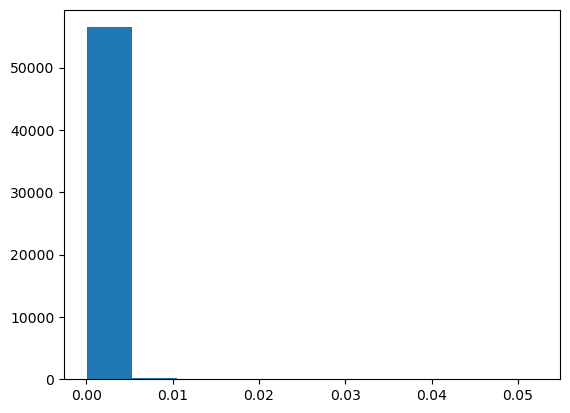

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

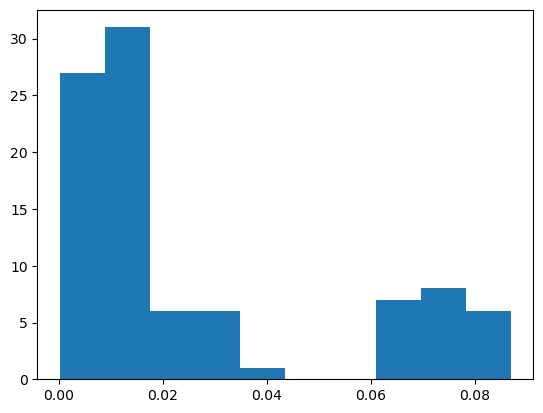

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

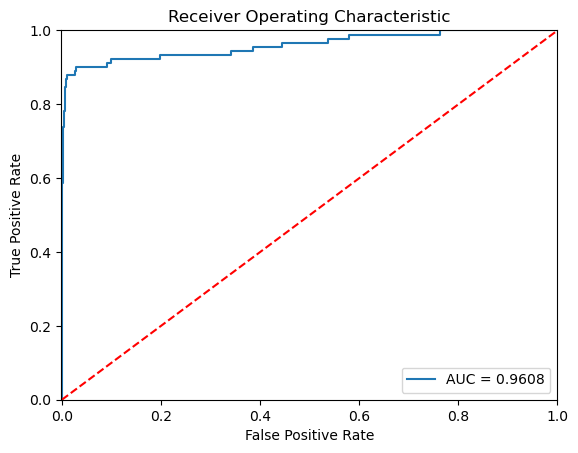

In [44]:
# curva ROC
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

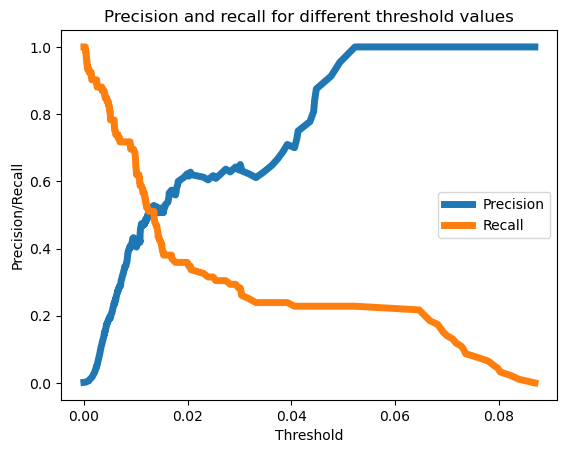

In [45]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(th, precision[1:], label="Precision", linewidth=5)
plt.plot(th, recall[1:], label="Recall", linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

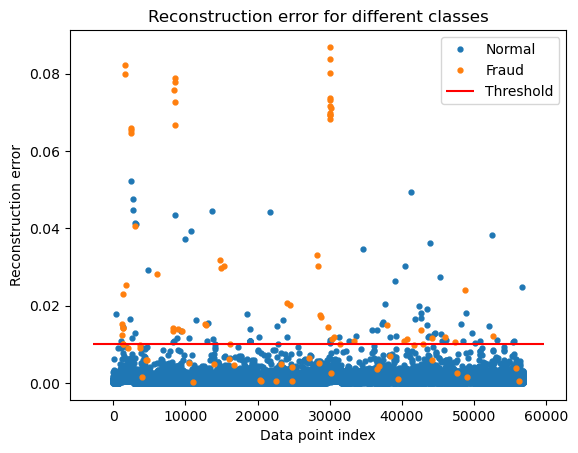

In [46]:
# plot the testing set with the threshold
threshold = 0.01
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [48]:
y_pred = [1 if e>0.03 else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
conf_matrix

array([[56727,    15],
       [   66,    26]], dtype=int64)

In [50]:
csr = classification_report(error_df.true_class, y_pred)
print(csr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56742
           1       0.63      0.28      0.39        92

    accuracy                           1.00     56834
   macro avg       0.82      0.64      0.70     56834
weighted avg       1.00      1.00      1.00     56834



In [55]:
h2o.shutdown()

In [56]:
h2o.shutdown()